Minimierer  1 : [-11.61731738  12.61795306  -0.02584884   0.45980597   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           1.           1.           1.
   1.           1.           1.           1.        ]
Minimum 1 : 98.8120521940354


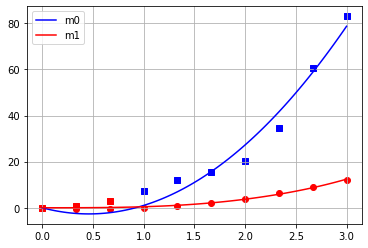

Minimierer  2 : [-11.61741715  12.61799271  -0.02589779   0.45980716   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           1.
   0.           0.           1.           1.           1.
   1.           1.           1.           1.        ]
Minimum 2 : 98.81205220220389


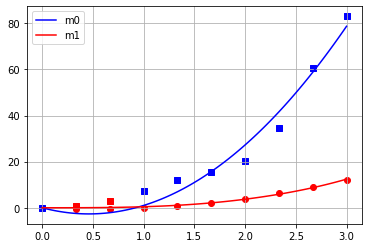

Minimierer  3 : [-1.99998341  1.99999355  5.00000776  2.99999979  0.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Minimum 3 : 3.916457820290119e-10


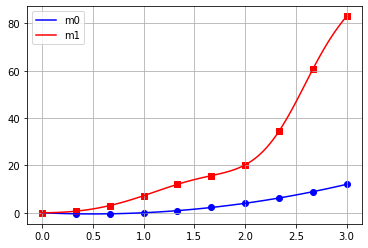

Beste Lösung: [-1.99998341  1.99999355  5.00000776  2.99999979  0.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
zugehöriger Minimalwert: 3.916457820290119e-10


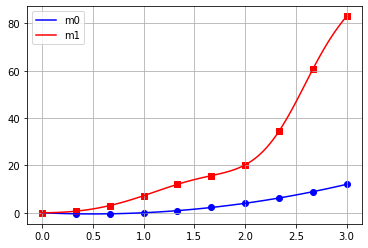

0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Erstellung eines Datensatzes an Messwerten
# Input: Basisfunktionen, Parameterwerte, m = Anzahl der Messwerte, verteilung = zufällige oder gleichmäßige Verteilung der Messpunkte
# fehler = prozentualer Fehler der zu y addiert werden soll, range_x = Anfangs- und Endpunkt der x-Werte

def messwerte(basisfkt1, basisfkt2, parameter1, parameter2, m, verteilung, fehler, range_x):
    if verteilung=='zufällig':
        x1_values=np.random.uniform(range_x[0],range_x[1], size=(m//2))
        x2_values=np.random.uniform(range_x[0],range_x[1], size=(m//2))
    if verteilung=='gleichverteilt':
        x1_values=np.linspace(range_x[0],range_x[1], (m//2))
        x2_values=np.linspace(range_x[0],range_x[1], (m//2))
    x_values=np.concatenate((x1_values, x2_values))
    y_values=np.concatenate((np.dot(parameter1,basisfkt1(x1_values)), np.dot(parameter2,basisfkt2(x2_values))))
    y_values=y_values+fehler*y_values*np.random.randn(m)
    return x_values, y_values

# Input: Basisfunktionen und Messwerte
# enthält m1 = erste Modellfunktion, m2 = zweite Modellfunktion, fkt = Zielfunktion des Minimierugsproblems, df = Ableitung der Zielfunktion

class beispielkonstruktion:
    def __init__(self, basisfkt1, basisfkt2, x_values, y_values):
        self.m=len(x_values)    #Dimension von w
        self.p1=len(basisfkt1(1)) #Dimension von theta1
        self.p2=len(basisfkt2(1)) #Dimension von theta2
        self.p=self.p1+self.p2  #Dimension von theta
        self.x_values=x_values
        self.y_values=y_values
        self.basisfkt1=basisfkt1
        self.basisfkt2=basisfkt2
    
    def m1(self, theta_1, x):
        return np.dot(theta_1,self.basisfkt1(x)) #erstellen der ersten Modellfunktion aus basisfkt1 und parameter1
    
    def m2(self, theta_2, x):
        return np.dot(theta_2,self.basisfkt2(x)) #erstellen der zweiten Modellfunktion aus basisfkt2 und parameter2
    
    
    
    def fkt(self, theta_w): #Erstellung der Zielfunktion 
        theta1=theta_w[:self.p1]
        theta2=theta_w[self.p1:self.p]
        w=theta_w[self.p:]
        f=0
        for i in range(self.m):
            f=f+(w[i])*((np.dot(theta1,self.basisfkt1(self.x_values[i]))-self.y_values[i])**2)+(1-w[i])*((np.dot(theta2,self.basisfkt2(self.x_values[i]))-self.y_values[i])**2)
        return 0.5*f 
    
    def df(self, theta_w): #Ableitung der Zielfunktion
        theta1=theta_w[:self.p1]
        theta2=theta_w[self.p1:self.p]
        w=theta_w[self.p:]
        gradient=[]
        
        for j in range(self.p1): #Ableitung nach theta1
            df=0
            for i in range(self.m):
                df+=w[i]*self.basisfkt1(self.x_values[i])[j]*(np.dot(theta1,self.basisfkt1(self.x_values[i]))-self.y_values[i])
            gradient.append(df) 
        
        for j in range(self.p2): #Ableitung nach theta2
            df=0
            for i in range(self.m):
                df+=(1-w[i])*self.basisfkt2(self.x_values[i])[j]*(np.dot(theta2,self.basisfkt2(self.x_values[i]))-self.y_values[i])
            gradient.append(df)                                                       
        
        for i in range (self.m): #Ableitung nach w
            dfi=0.5*(np.dot(theta1,self.basisfkt1(self.x_values[i]))-self.y_values[i])**2-0.5*(np.dot(theta2,self.basisfkt2(self.x_values[i]))-self.y_values[i])**2
            gradient.append(dfi)
        return gradient

    

def solve(bsp): #Löser für relaxiertes Problem
    bounds=[]
    for i in range(bsp.p): #keine bounds für theta
        bounds.append((None,None))
    
    for i in range(bsp.m): #bounds für w 
        bounds.append((0,1))

    initial_values=[] #liste mit initial values
    initial_value1=[0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1]
    initial_values.append(initial_value1)
    initial_value2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
    initial_values.append(initial_value2)
    initial_value3=[1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0]
    initial_values.append(initial_value3)
    
    solutions=[] #für jeden initial value wird eine Lösung berechnet
    for i in range (3):
        minimum=minimize(bsp.fkt, initial_values[i], bounds=bounds, jac=bsp.df)
        print('Minimierer ', i+1, ':', minimum.x)
        print('Minimum', i+1, ':', bsp.fkt(minimum.x))
        plot_functions(bsp,minimum.x)
        solutions.append(minimum.x)
    v_opt=min(solutions, key=lambda l: bsp.fkt(l)) #die Lösung mit kleinstem Optimalwert wird bestimmt
    v_opt_theta=v_opt[:bsp.p]
    v_opt_w=v_opt[bsp.p:]
    for i in range (bsp.m): #alle nicht binären Einträge der Lösung werden gleich 0 gesetzt  
        if (v_opt_w[i]%1!=0):
            v_opt_w[i]=0
    v_opt=np.concatenate((v_opt_theta, v_opt_w))
    return v_opt



#plot der beiden Modellfunktionen und der Messwerte mit entsprechender Zuordnung zu Funktionen:

def plot_functions(beispiel, theta_w_optimal):
    
    #plotten der Modellfunktionen mit der Kleinste Quadrate Lösung als optimale Parameter:
    def funktion1(x):
        return beispiel.m1(theta_w_optimal[:beispiel.p1], x)

    def funktion2(x):
        return beispiel.m2(theta_w_optimal[beispiel.p1:beispiel.p], x)

    x_values=np.linspace(min(beispiel.x_values), max(beispiel.x_values), 100)
    y1_values=funktion1(x_values)
    y2_values=funktion2(x_values)
    plt.plot(x_values, y1_values, color='blue', label="m0")
    plt.plot(x_values, y2_values, color='red', label="m1")
    
    #plot der Datenpunkte:
    
    x_f1=[]
    y_f1=[] # Punkte, die ursprünglich zu m1 gehört haben und m1 zugeordnet wurden
    x_f2=[]
    y_f2=[] # Punkte, die ursprünglich zu m1 gehört haben und m2 zugeordnet wurden
    x_f3=[]
    y_f3=[] # Punkte, die ursprünglich zu m2 gehört haben und m1 zugeordnet wurden
    x_f4=[]
    y_f4=[] # Punkte, die ursprünglich zu m2 gehört haben und m2 zugeordnet wurden
    
    for i in range (beispiel.m//2):
        if theta_w_optimal[beispiel.p:][i]==1:
            x_f1.append(beispiel.x_values[i])
            y_f1.append(beispiel.y_values[i])
        else:
            x_f2.append(beispiel.x_values[i])
            y_f2.append(beispiel.y_values[i])
    
    for i in range (beispiel.m//2):
        if theta_w_optimal[beispiel.p:][(beispiel.m//2)+i]==1:
            x_f3.append(beispiel.x_values[(beispiel.m//2)+i])
            y_f3.append(beispiel.y_values[(beispiel.m//2)+i])
        else:
            x_f4.append(beispiel.x_values[(beispiel.m//2)+i])
            y_f4.append(beispiel.y_values[(beispiel.m//2)+i])
    plt.scatter(x_f1, y_f1, color='blue', marker='o')
    plt.scatter(x_f2, y_f2, color='red', marker='o')
    plt.scatter(x_f3, y_f3, color='blue', marker='s')
    plt.scatter(x_f4, y_f4, color='red', marker='s')

    plt.legend()
    plt.grid(True)
    plt.show()
    return 0

#Eingabe (falls messdaten gegeben): [basisfunktionen1, basisfunktionen2, x_werte_messdaten, y_werte_messdaten]
#Eingabe (falls messdaten aus modellfunktionen erzeugt werden sollen)[basisfunktionen1, basisfunktionen2, parameter_fkt1, parameter_fkt2, anzahl_messwerte, messwerte 'gleichverteilt' oder 'zufällig', messfehler, Intervall in dem sich x-Werte befinden sollen]
def loesung(bsp_daten):
    if len(bsp_daten)==4:
        Messwerte=[bsp_daten[2],bsp_daten[3]]
    else:
        Messwerte=messwerte(bsp_daten[0],bsp_daten[1],bsp_daten[2],bsp_daten[3],bsp_daten[4],bsp_daten[5],bsp_daten[6],bsp_daten[7])
    Beispiel=beispielkonstruktion(bsp_daten[0],bsp_daten[1],Messwerte[0],Messwerte[1])
    theta_w_optimal=solve(Beispiel)
    print('Beste Lösung:',theta_w_optimal)
    print('zugehöriger Minimalwert:', Beispiel.fkt(theta_w_optimal))
    plot_functions(Beispiel,theta_w_optimal)
    return 0


#Definition Beispiel aus kapitel 6.1: verschiedene Initialvektoren

def basisfkt1_2(x):
    return np.array([x, x**2])

def basisfkt2_2(x):
    return np.array([np.sin(x**2), x**3]) 

parameter1_2=np.array([-2, 2])
parameter2_2=np.array([5,3])

beispiel_initialvektoren=[basisfkt1_2, basisfkt2_2, parameter1_2, parameter2_2, 20, 'gleichverteilt', 0, [0,3]]


loesung(beispiel_initialvektoren)